In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [80]:
def _normalize_covariate_data(covariate_data, exclude_columns=[]):
    included_filter = np.ones(covariate_data.shape[1])
    included_filter[exclude_columns] = 0
    excluded_filter = 1 - included_filter

    X_min = np.min(covariate_data, axis=0)
    X_max = np.max(covariate_data, axis=0)

    # Amount to shift columns. Excluded cols shift 0.
    column_shifts = (-1*X_min) * included_filter

    # Amount to scale columns. Excluded cols scale by 1.
    column_scales = ((X_max - X_min) * included_filter) + excluded_filter

    normalized_data = (covariate_data + column_shifts)/column_scales
    scaled_data = (normalized_data * ((2*included_filter) + excluded_filter)) - (1*included_filter)
    
    return scaled_data

In [81]:
x = np.random.normal(loc=0, scale=10, size=(300, 2))

(array([ 1.,  6., 17., 40., 65., 69., 53., 36.,  8.,  5.]),
 array([-31.83189311, -25.84321441, -19.85453571, -13.86585701,
         -7.87717831,  -1.88849961,   4.10017909,  10.08885779,
         16.07753649,  22.06621519,  28.05489389]),
 <a list of 10 Patch objects>)

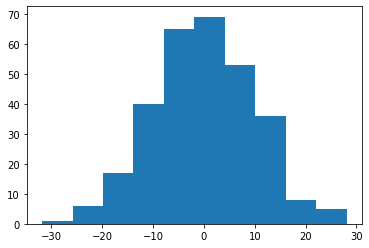

In [86]:
plt.hist(x[:, 1])

(array([ 1.,  6., 17., 40., 65., 69., 53., 36.,  8.,  5.]),
 array([-31.83189311, -25.84321441, -19.85453571, -13.86585701,
         -7.87717831,  -1.88849961,   4.10017909,  10.08885779,
         16.07753649,  22.06621519,  28.05489389]),
 <a list of 10 Patch objects>)

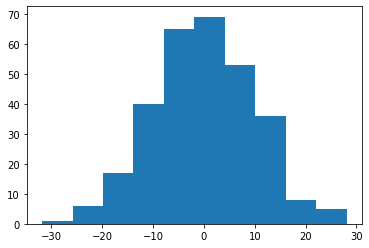

In [85]:
plt.hist(_normalize_covariate_data(x, exclude_columns=[1])[:, 1])